# Run after Step 1 is finished. This is the meat of the analysis process!

The final outputs of this code are the characteristic decay times (taus), the fit parameters that resulted in the taus, and a basic picture of what the data looks like for a particular video or sample.

You need to be careful with the way you handle the data. There is a lot of data to work with, save, and organize. I would recommend in the beginning going video by video. Once you feel more confident then you could go sample by sample.

This is a very interactive code, you will probably have to run steps multiple times before you get fits that work well. Try to keep track of where you are in the code and what you have run so far, it will help you save time in the long run.

Step 1. Initialize the necessary python modules. 

In [2]:
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

from IPython.html.widgets import interact, fixed
import ipywidgets as widgets

import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import sys
import glob #glob is helpful for searching for filenames or directories
#sys.path.append('/Volumes/McGorty Lab Data/Jon_Garamella_2019/code/DDM/Differential-Dynamic-Microscopy---Python')
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
import pickle #for saving data
from scipy.special import gamma

C:\ProgramData\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [3]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

#import mpld3

# Use seaborn styles for nice-looking plots
#import seaborn; seaborn.set()

Step 2. Define the framerate, the pixel size and the dimension of the ROI you are going to analyze.
** you will also be initializing the newt function, don't worry about it--but we may use it later on in the plotting of data

In [4]:
newt = lambda t,s: (1./s)*gamma(1./s)*t
#framerate = 30.0
#px = 0.2095
#imDimension = 128
framerate = 60
px = 0.2095/1.6
imDimension = 128
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*(px))) 

In [5]:
print(q)
#xx=1;
#yy=ddm.foo(xx)

[ 0.          0.37489172  0.74978345  1.12467517  1.4995669   1.87445862
  2.24935035  2.62424207  2.9991338   3.37402552  3.74891725  4.12380897
  4.4987007   4.87359242  5.24848415  5.62337587  5.9982676   6.37315932
  6.74805105  7.12294277  7.4978345   7.87272622  8.24761794  8.62250967
  8.99740139  9.37229312  9.74718484 10.12207657 10.49696829 10.87186002
 11.24675174 11.62164347 11.99653519 12.37142692 12.74631864 13.12121037
 13.49610209 13.87099382 14.24588554 14.62077727 14.99566899 15.37056072
 15.74545244 16.12034417 16.49523589 16.87012761 17.24501934 17.61991106
 17.99480279 18.36969451 18.74458624 19.11947796 19.49436969 19.86926141
 20.24415314 20.61904486 20.99393659 21.36882831 21.74372004 22.11861176
 22.49350349 22.86839521 23.24328694 23.61817866]


Step 3. This step is only to be executed at the beginning of the analysis process or at the start of a new video after you have saved the data from the previous. 
It is very important that you do not run it in the middle of all of your analysis, or each time you run the code because you will lose ALL of you work to that point. 

This step is to initialize a dictionary that will store all of the relevant information for you.

Comment it out after you have initialized it!

In [740]:
allResults = {} #comment me out after I have been run--or you will be very sorry

Step 4. Loading in the FFT file that you want to analyze. Jupyter notebook doesn't really like when you use variable strings so just enter in the numbers manually into the file you want to analyze.

In [741]:
#ROIs = ["T1128", "T2128", "T3128", "T4128", "T5128","T6128", "T7128", "T8128", "T9128", "T10128"]
#ROIs = ["B1128", "B2128", "B3128", "B4128", "B5128","B6128", "B7128", "B8128", "B9128", "B10128"]
ROIs = ["T1128", "T2128", "T3128", "T4128", "T5128","T6128", "T7128", "T8128", "T9128", "T10128"]
video = "high"
#Topology = "Linear"
#Date = "121218"
#Condition = "None"
#data_dir = "Y:\\Karthik_KRP\\DDM\\20210608\\10\\"
#data_dir = "Z:\\Ryan C\\Data\\DDM_Karthik\\20210729\\tif files\\"
data_dir = "C:\\Users\\kpeddireddy\\Desktop\\Python\\20220202\\"
name = "Trial_24"
Trial_No = [name]
filename1 = "%s_T_2pi.csv" % name
filename2 = "%s_T_0.5pi.csv" % name
filename3 = "%s_T_0.25pi.csv" % name

data_file = Trial_No[0]+"_"+ROIs[0]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_1 = dat['ravs'] 
dts  = dat['dts']
ffts_1 = dat['ffts']
times = dts/framerate

data_file = Trial_No[0]+"_"+ROIs[1]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_2 = dat['ravs'] 
dts  = dat['dts']
ffts_2 = dat['ffts']
times = dts/framerate

data_file = Trial_No[0]+"_"+ROIs[2]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_3 = dat['ravs'] 
dts  = dat['dts']
ffts_3 = dat['ffts']
times = dts/framerate

data_file = Trial_No[0]+"_"+ROIs[3]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_4 = dat['ravs'] 
dts  = dat['dts']
ffts_4 = dat['ffts']
times = dts/framerate

data_file = Trial_No[0]+"_"+ROIs[4]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_5 = dat['ravs'] 
dts  = dat['dts']
ffts_5 = dat['ffts']
times = dts/framerate

data_file = Trial_No[0]+"_"+ROIs[5]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_6 = dat['ravs'] 
dts  = dat['dts']
ffts_6 = dat['ffts']
times = dts/framerate

data_file = Trial_No[0]+"_"+ROIs[6]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_7 = dat['ravs'] 
dts  = dat['dts']
ffts_7 = dat['ffts']
times = dts/framerate

data_file = Trial_No[0]+"_"+ROIs[7]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_8 = dat['ravs'] 
dts  = dat['dts']
ffts_8 = dat['ffts']
times = dts/framerate

data_file = Trial_No[0]+"_"+ROIs[8]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_9 = dat['ravs'] 
dts  = dat['dts']
ffts_9 = dat['ffts']
times = dts/framerate

data_file = Trial_No[0]+"_"+ROIs[9]+"_FFTDIFFS_dts_ffts_ravs.p"
dat = pickle.load(open(data_dir+data_file,'rb'))
ravs_10 = dat['ravs'] 
dts  = dat['dts']
ffts_10 = dat['ffts']
times = dts/framerate

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


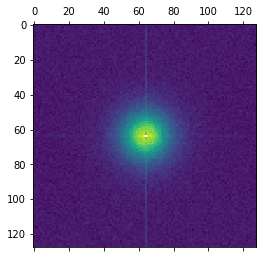

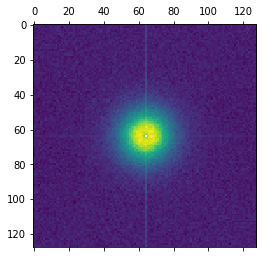

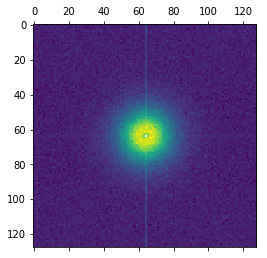

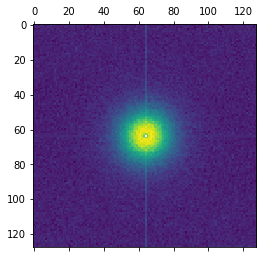

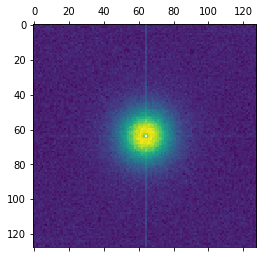

In [742]:
%matplotlib inline
index=15
test = ffts_1[index].copy()
#test[:,64]=np.nan
plt.matshow(np.log(test))

test = ffts_3[index].copy()
#test[:,64]=np.nan
plt.matshow(np.log(test))

test = ffts_5[index].copy()
#test[:,64]=np.nan
plt.matshow(np.log(test))

test = ffts_7[index].copy()
#test[:,64]=np.nan
plt.matshow(np.log(test))

test = ffts_9[index].copy()
#test[:,64]=np.nan
plt.matshow(np.log(test))

## Now we calculate the alignment factor

Alignment factor from: Varga, Z. & Swan, J. W. Large scale anisotropies in sheared colloidal gels. 
Journal of Rheology 62, 405–418 (2018).

In [743]:
x = np.arange(-1*ffts_1[0].shape[1]/2, ffts_1[0].shape[1]/2, 1) #making grid
y = np.arange(-1*ffts_1[0].shape[0]/2, ffts_1[0].shape[0]/2, 1)
xx, yy = np.meshgrid(x, y)
orientation_axis = np.pi/0.5 #defining the orientation angle 
cos2theta = np.cos(2*(np.arctan(1.0*xx/yy)+orientation_axis))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


<IPython.core.display.Javascript object>


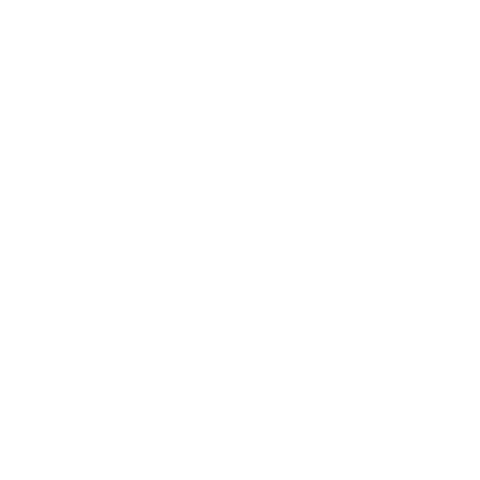

In [744]:
#just inspecting this 'cos2theta' matrix for the educational value

%matplotlib notebook
plt.matshow(cos2theta)
plt.show()

In [745]:
indices_start = np.arange(2,50,2) #these correspond to the time lags (in frames)
length_of_radav = 30 #we'll radial average the image structure function out to some maximum length
afs = np.zeros((10,len(indices_start))) #empty array for storing alignment factors (10 rois)

for j,index1 in enumerate(indices_start):
    #index1 = 200 #index
    step = 10 #we'll average over 10 time lags
    index2 = index1 + step
    xc = 64 #x-center, should just be half the ROI size
    yc = 64 #y-center
    
    #range of wave vectors to average over
    q_start = 3
    q_end = 15

    '''1st ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_1[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_1[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_1 = af_num / af_den
    afs[0,j] = np.nanmean(af_1[q_start:q_end])

    '''2nd ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_2[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_2[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_2 = af_num / af_den
    afs[1,j] = np.nanmean(af_2[q_start:q_end])

    '''3rd ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_3[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_3[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_3 = af_num / af_den
    afs[2,j] = np.nanmean(af_3[q_start:q_end])

    '''4th ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_4[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_4[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_4 = af_num / af_den
    afs[3,j] = np.nanmean(af_4[q_start:q_end])

    '''5th ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_5[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_5[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_5 = af_num / af_den
    afs[4,j] = np.nanmean(af_5[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_6[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_6[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_6 = af_num / af_den
    afs[5,j] = np.nanmean(af_6[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_7[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_7[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_7 = af_num / af_den
    afs[6,j] = np.nanmean(af_7[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_8[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_8[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_8 = af_num / af_den
    afs[7,j] = np.nanmean(af_8[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_9[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_9[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_9 = af_num / af_den
    afs[8,j] = np.nanmean(af_9[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_10[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_10[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_10 = af_num / af_den
    afs[9,j] = np.nanmean(af_10[q_start:q_end])

<IPython.core.display.Javascript object>


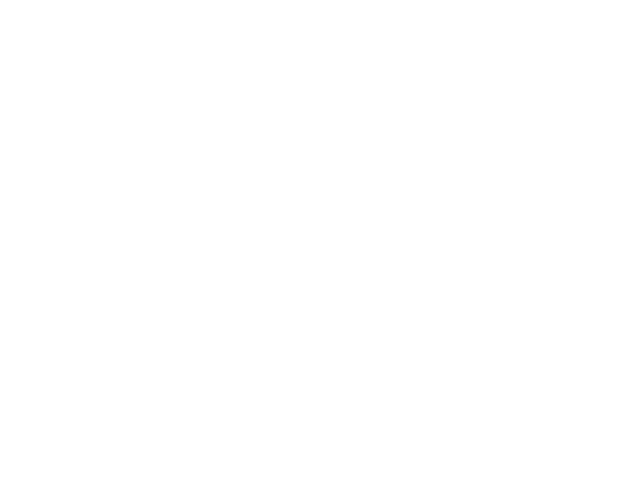

In [746]:
plt.figure()
plt.plot((1./framerate)*indices_start,afs[0],'--r.', label="1")
plt.plot((1./framerate)*indices_start,afs[2],'--b.', label="3")
plt.plot((1./framerate)*indices_start,afs[4],'--g.', label="5")
plt.plot((1./framerate)*indices_start,afs[6],'--m.', label="7")
plt.plot((1./framerate)*indices_start,afs[8],'--k.', label="9")
plt.xlabel("Time Lag (s)")
plt.ylabel("Alignment Factor")
plt.legend()

In [747]:
#np.savetxt("Y:\\Karthik_KRP\\DDM\\data\\Trial_15_T_2pi.csv", afs, delimiter=",")

In [748]:
np.savetxt("C:\\Users\\kpeddireddy\\Desktop\\Python\\20220202\\Alignment Data\\"+filename1, afs, delimiter=",")

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


<IPython.core.display.Javascript object>


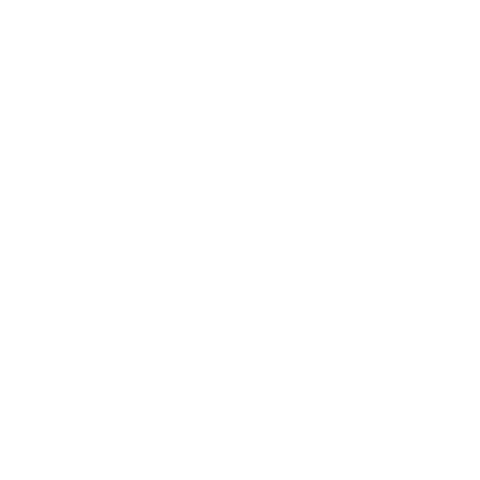

<IPython.core.display.Javascript object>


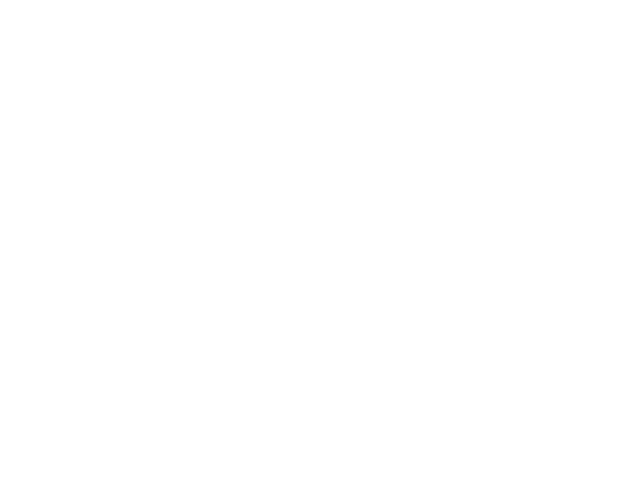

In [749]:
x = np.arange(-1*ffts_1[0].shape[1]/2, ffts_1[0].shape[1]/2, 1) #making grid
y = np.arange(-1*ffts_1[0].shape[0]/2, ffts_1[0].shape[0]/2, 1)
xx, yy = np.meshgrid(x, y)
orientation_axis = np.pi/2 #defining the orientation angle 
cos2theta = np.cos(2*(np.arctan(1.0*xx/yy)+orientation_axis))

#just inspecting this 'cos2theta' matrix for the educational value

%matplotlib notebook
plt.matshow(cos2theta)
plt.show()

indices_start = np.arange(2,50,2) #these correspond to the time lags (in frames)
length_of_radav = 30 #we'll radial average the image structure function out to some maximum length
afs = np.zeros((10,len(indices_start))) #empty array for storing alignment factors (10 rois)

for j,index1 in enumerate(indices_start):
    #index1 = 200 #index
    step = 10 #we'll average over 10 time lags
    index2 = index1 + step
    xc = 64 #x-center, should just be half the ROI size
    yc = 64 #y-center
    
    #range of wave vectors to average over
    q_start = 3
    q_end = 15

    '''1st ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_1[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_1[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_1 = af_num / af_den
    afs[0,j] = np.nanmean(af_1[q_start:q_end])

    '''2nd ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_2[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_2[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_2 = af_num / af_den
    afs[1,j] = np.nanmean(af_2[q_start:q_end])

    '''3rd ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_3[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_3[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_3 = af_num / af_den
    afs[2,j] = np.nanmean(af_3[q_start:q_end])

    '''4th ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_4[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_4[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_4 = af_num / af_den
    afs[3,j] = np.nanmean(af_4[q_start:q_end])

    '''5th ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_5[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_5[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_5 = af_num / af_den
    afs[4,j] = np.nanmean(af_5[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_6[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_6[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_6 = af_num / af_den
    afs[5,j] = np.nanmean(af_6[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_7[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_7[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_7 = af_num / af_den
    afs[6,j] = np.nanmean(af_7[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_8[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_8[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_8 = af_num / af_den
    afs[7,j] = np.nanmean(af_8[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_9[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_9[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_9 = af_num / af_den
    afs[8,j] = np.nanmean(af_9[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_10[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_10[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_10 = af_num / af_den
    afs[9,j] = np.nanmean(af_10[q_start:q_end])

plt.figure()
plt.plot((1./framerate)*indices_start,afs[0],'--r.', label="1")
plt.plot((1./framerate)*indices_start,afs[2],'--b.', label="3")
plt.plot((1./framerate)*indices_start,afs[4],'--g.', label="5")
plt.plot((1./framerate)*indices_start,afs[6],'--m.', label="7")
plt.plot((1./framerate)*indices_start,afs[8],'--k.', label="9")
plt.xlabel("Time Lag (s)")
plt.ylabel("Alignment Factor")
plt.legend()

np.savetxt("C:\\Users\\kpeddireddy\\Desktop\\Python\\20220202\\Alignment Data\\"+filename2, afs, delimiter=",")

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


<IPython.core.display.Javascript object>


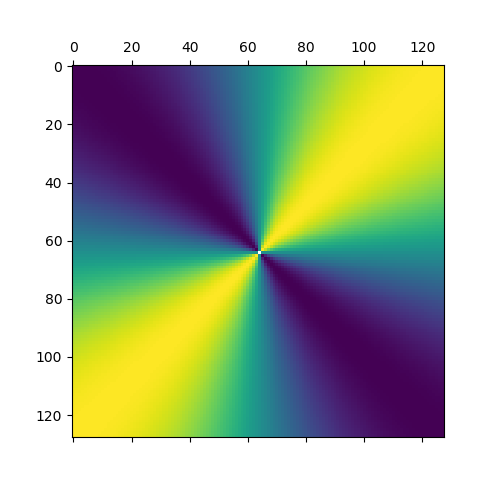

<IPython.core.display.Javascript object>


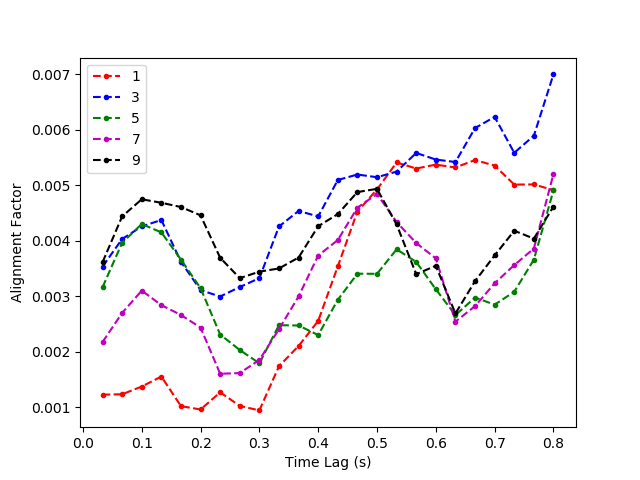

In [750]:
x = np.arange(-1*ffts_1[0].shape[1]/2, ffts_1[0].shape[1]/2, 1) #making grid
y = np.arange(-1*ffts_1[0].shape[0]/2, ffts_1[0].shape[0]/2, 1)
xx, yy = np.meshgrid(x, y)
orientation_axis = np.pi/4 #defining the orientation angle 
cos2theta = np.cos(2*(np.arctan(1.0*xx/yy)+orientation_axis))

#just inspecting this 'cos2theta' matrix for the educational value

%matplotlib notebook
plt.matshow(cos2theta)
plt.show()

indices_start = np.arange(2,50,2) #these correspond to the time lags (in frames)
length_of_radav = 30 #we'll radial average the image structure function out to some maximum length
afs = np.zeros((10,len(indices_start))) #empty array for storing alignment factors (10 rois)

for j,index1 in enumerate(indices_start):
    #index1 = 200 #index
    step = 10 #we'll average over 10 time lags
    index2 = index1 + step
    xc = 64 #x-center, should just be half the ROI size
    yc = 64 #y-center
    
    #range of wave vectors to average over
    q_start = 3
    q_end = 15

    '''1st ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_1[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_1[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_1 = af_num / af_den
    afs[0,j] = np.nanmean(af_1[q_start:q_end])

    '''2nd ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_2[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_2[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_2 = af_num / af_den
    afs[1,j] = np.nanmean(af_2[q_start:q_end])

    '''3rd ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_3[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_3[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_3 = af_num / af_den
    afs[2,j] = np.nanmean(af_3[q_start:q_end])

    '''4th ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_4[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_4[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_4 = af_num / af_den
    afs[3,j] = np.nanmean(af_4[q_start:q_end])

    '''5th ROI'''
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_5[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_5[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_5 = af_num / af_den
    afs[4,j] = np.nanmean(af_5[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_6[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_6[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_6 = af_num / af_den
    afs[5,j] = np.nanmean(af_6[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_7[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_7[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_7 = af_num / af_den
    afs[6,j] = np.nanmean(af_7[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_8[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_8[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_8 = af_num / af_den
    afs[7,j] = np.nanmean(af_8[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_9[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_9[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_9 = af_num / af_den
    afs[8,j] = np.nanmean(af_9[q_start:q_end])
    
    #get numerator of alignment factor
    af_num1, af_num2 = ddm.radiav.radav(ffts_10[index1:index2].mean(axis=0) * cos2theta, xc, yc, length_of_radav)
    af_num = af_num1*af_num2

    #get denominator of alignment factor
    af_den1, af_den2 = ddm.radiav.radav(ffts_10[index1:index2].mean(axis=0), xc, yc, length_of_radav)
    af_den = af_den1*af_den2

    af_10 = af_num / af_den
    afs[9,j] = np.nanmean(af_10[q_start:q_end])

plt.figure()
plt.plot((1./framerate)*indices_start,afs[0],'--r.', label="1")
plt.plot((1./framerate)*indices_start,afs[2],'--b.', label="3")
plt.plot((1./framerate)*indices_start,afs[4],'--g.', label="5")
plt.plot((1./framerate)*indices_start,afs[6],'--m.', label="7")
plt.plot((1./framerate)*indices_start,afs[8],'--k.', label="9")
plt.xlabel("Time Lag (s)")
plt.ylabel("Alignment Factor")
plt.legend()

np.savetxt("C:\\Users\\kpeddireddy\\Desktop\\Python\\20220202\\Alignment Data\\"+filename3, afs, delimiter=",")